In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, label_binarize

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./NewspaperChurn.csv")
df.head(5)

,SubscriptionID,HH Income,Home Ownership,Ethnicity,dummy for Children,Year Of Residence,Age range,Language,Address,State,City,County,Zip Code,weekly fee,Deliveryperiod,Nielsen Prizm,Source Channel,Subscriber
0,180590686,"$ 30,000 - $39,999",RENTER,German,N,1,25-29,German,1 3RD PL UNIT 703,CA,LONG BEACH,LOS ANGELES,90802,$7.00 - $7.99,7Day,FM,CircAdm,NO
1,181401653,"$500,000 Plus",OWNER,unknown,Y,14,50-54,NaN,1 AVIGNON,CA,NEWPORT COAST,ORANGE,92657,$0.01 - $0.50,SunOnly,MW,Partner,YES
2,180374685,"$100,000 - $124,999",OWNER,Italian,Y,7,45-49,English,1 BLACKSWAN,CA,IRVINE,ORANGE,92604,$0.01 - $0.50,SunOnly,MW,Partner,YES
3,180703483,"$200,000 - $249,999",OWNER,English,N,23,55-59,English,1 BLUE HORIZON,CA,LAGUNA NIGUEL,ORANGE,92677,$1.00 - $1.99,SunOnly,MW,Internet,NO
4,180358906,"$ 50,000 - $59,999",OWNER,Italian,N,23,60-64,English,1 BRISA DEL LAGO,CA,RANCHO SANTA MARGARITA,ORANGE,92688,$8.00 - $8.99,Thu-Sun,MM,Crew,YES


In [3]:
df.describe()

,SubscriptionID,Year Of Residence,Zip Code
count,1.585500e+04,15855.000000,15855.000000
mean,1.643729e+08,13.546137,92424.541911
std,2.356755e+07,11.770368,733.648427
min,1.100011e+08,1.000000,90603.000000
25%,1.501824e+08,4.000000,92627.000000
50%,1.803333e+08,10.000000,92688.000000
75%,1.806362e+08,21.000000,92806.000000
max,1.815541e+08,56.000000,92887.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SubscriptionID      15855 non-null  int64 
 1   HH Income           15855 non-null  object
 2   Home Ownership      15855 non-null  object
 3   Ethnicity           15855 non-null  object
 4   dummy for Children  15855 non-null  object
 5   Year Of Residence   15855 non-null  int64 
 6   Age range           15747 non-null  object
 7   Language            14848 non-null  object
 8   Address             15855 non-null  object
 9   State               15855 non-null  object
 10  City                15855 non-null  object
 11  County              15855 non-null  object
 12  Zip Code            15855 non-null  int64 
 13  weekly fee          15669 non-null  object
 14  Deliveryperiod      15855 non-null  object
 15  Nielsen Prizm       15726 non-null  object
 16  Source Channel      15

### **1. Dataset Overview**
- **Total entries:** 15,855
- **Columns:** 18 (15 categorical, 3 numerical)
- **Potential ML Objective:** Predicting subscriber churn (whether a customer continues or cancels their subscription).

---

### **2. Column Breakdown and Interpretation**

#### **A. Identification & Demographic Attributes:**
1. **SubscriptionID (int64):** Unique identifier for each subscriber. Likely not useful for predictive modeling, can be dropped.
2. **HH Income (object):** Household income categories, contains values with currency symbols and ranges (e.g., `$500,000 Plus`, `39,999`). Will need conversion to numeric for ML.
3. **Home Ownership (object):** Categorical variable indicating whether the household owns or rents the home (OWNER/RENTER).
4. **Ethnicity (object):** Categorical variable indicating subscriber’s ethnicity (e.g., `German`, `Italian`, `unknown`). Some values might require consolidation.
5. **dummy for Children (object):** Binary categorical field indicating if children are present in the household (`Y/N`). Could be converted to binary (1/0).
6. **Year Of Residence (int64):** Number of years the subscriber has lived at the current address, ranging from 1 to 56 years.
7. **Age range (object):** Age group categories (e.g., `25-29`, `50-54`). Needs to be ordinally encoded.
8. **Language (object):** The subscriber’s preferred language (e.g., `English`, `German`). Some missing values.

#### **B. Address-Related Attributes:**
9. **Address (object):** Full address information; likely unnecessary for ML modeling unless geospatial analysis is needed.
10. **State (object):** All entries belong to `CA`, indicating geographical consistency.
11. **City (object):** Categorical feature with potential impact on subscription behavior.
12. **County (object):** May provide regional insights; potential feature for analysis.
13. **Zip Code (int64):** Numeric feature representing location, could be useful for clustering or geospatial modeling.

#### **C. Subscription Details:**
14. **weekly fee (object):** Pricing of the newspaper subscription, contains currency symbols and missing values; requires conversion to numeric.
15. **Deliveryperiod (object):** Subscription type (`7Day`, `SunOnly`, etc.); categorical and could impact churn prediction.
16. **Nielsen Prizm (object):** Customer segmentation data; useful for profiling subscribers but has missing values.
17. **Source Channel (object):** The acquisition source (e.g., `CircAdm`, `Partner`); might influence churn likelihood.
18. **Subscriber (object):** The target variable for churn prediction (`YES/NO`). Should be converted to binary (1 for YES, 0 for NO).

---

### **3. Data Quality Observations:**
- **Missing Values:** 
  - Columns `Age range`, `Language`, `weekly fee`, and `Nielsen Prizm` have missing values.
  - Possible handling strategies: imputation, dropping rows, or feature engineering.

- **Data Types Issues:**
  - `HH Income`, `weekly fee` need to be converted to numerical.
  - Categorical variables need encoding for ML models.

- **Outliers and Distribution:**
  - The `Year Of Residence` column ranges from 1 to 56 years, which may have potential outliers.
  - The `weekly fee` may contain extreme values.

---

In [5]:
# Drop irrelevant columns
df.drop(columns=['SubscriptionID', 'Address','City', 'Zip Code','County','State'], inplace=True)
df.head()

,HH Income,Home Ownership,Ethnicity,dummy for Children,Year Of Residence,Age range,Language,weekly fee,Deliveryperiod,Nielsen Prizm,Source Channel,Subscriber
0,"$ 30,000 - $39,999",RENTER,German,N,1,25-29,German,$7.00 - $7.99,7Day,FM,CircAdm,NO
1,"$500,000 Plus",OWNER,unknown,Y,14,50-54,NaN,$0.01 - $0.50,SunOnly,MW,Partner,YES
2,"$100,000 - $124,999",OWNER,Italian,Y,7,45-49,English,$0.01 - $0.50,SunOnly,MW,Partner,YES
3,"$200,000 - $249,999",OWNER,English,N,23,55-59,English,$1.00 - $1.99,SunOnly,MW,Internet,NO
4,"$ 50,000 - $59,999",OWNER,Italian,N,23,60-64,English,$8.00 - $8.99,Thu-Sun,MM,Crew,YES


In [6]:
# Handle missing values
df.fillna({'Ethnicity': 'Unknown', 'Language': 'Unknown'}, inplace=True)
imputer = SimpleImputer(strategy='most_frequent')
df[['Home Ownership', 'dummy for Children', 'Age range']] = imputer.fit_transform(df[['Home Ownership', 'dummy for Children', 'Age range']])

In [7]:
# Convert income range to numerical values
def income_to_numeric(income):
    try:
        income = income.replace('$', '').replace(',', '').replace(' ', '').strip()
        if 'Plus' in income:
            return 500000
        if 'Under' in income:
            return int(income.replace('Under', '')) / 2
        if '-' in income:
            low, high = income.split('-')
            return (int(low) + int(high)) / 2
        else:
            return int(income)
    except Exception as e:
        return None  # Return None for problematic values

df['HH Income'] = df['HH Income'].apply(income_to_numeric)

# Handling any potential NaN values after conversion
df['HH Income'].fillna(df['HH Income'].median(), inplace=True)

In [8]:
# Convert weekly fee to numerical values
def weekly_fee_to_numeric(fee):
    try:
        fee = fee.replace('$', '').replace(' ', '').strip()
        if '-' in fee:
            low, high = fee.split('-')
            return (float(low) + float(high)) / 2
        else:
            return float(fee)
    except Exception as e:
        return None  # Return None for problematic values

df['weekly fee'] = df['weekly fee'].apply(weekly_fee_to_numeric)

# Handling any potential NaN values after conversion
df['weekly fee'].fillna(df['weekly fee'].median(), inplace=True)

In [9]:
# Feature engineering
df['Year Of Residence'] = df['Year Of Residence'].apply(lambda x: x if isinstance(x, (int, float)) and x > 0 else df['Year Of Residence'].median())
def process_age_range(age):
    if isinstance(age, str):
        if '-' in age:
            return int(age.split('-')[0])
        elif 'years or more' in age:
            return int(age.split(' ')[0])
        elif 'years or less' in age:
            return int(age.split(' ')[0])
        else:
            return int(age.replace('+', ''))
    return df['Age range'].median()

df['Age range'] = df['Age range'].apply(process_age_range)

In [10]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HH Income           15855 non-null  float64
 1   Home Ownership      15855 non-null  object 
 2   Ethnicity           15855 non-null  object 
 3   dummy for Children  15855 non-null  object 
 4   Year Of Residence   15855 non-null  int64  
 5   Age range           15855 non-null  int64  
 6   Language            15855 non-null  object 
 7   weekly fee          15855 non-null  float64
 8   Deliveryperiod      15855 non-null  object 
 9   Nielsen Prizm       15726 non-null  object 
 10  Source Channel      15855 non-null  object 
 11  Subscriber          15855 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.5+ MB


,HH Income,Home Ownership,Ethnicity,dummy for Children,Year Of Residence,Age range,Language,weekly fee,Deliveryperiod,Nielsen Prizm,Source Channel,Subscriber
0,34999.5,RENTER,German,N,1,25,German,7.495,7Day,FM,CircAdm,NO
1,500000.0,OWNER,unknown,Y,14,50,Unknown,0.255,SunOnly,MW,Partner,YES
2,112499.5,OWNER,Italian,Y,7,45,English,0.255,SunOnly,MW,Partner,YES
3,224999.5,OWNER,English,N,23,55,English,1.495,SunOnly,MW,Internet,NO
4,54999.5,OWNER,Italian,N,23,60,English,8.495,Thu-Sun,MM,Crew,YES


In [11]:
print("Rows and Column in Dataset are : " , df.shape)

Rows and Column in Dataset are :  (15855, 12)


In [12]:
# Check and count duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
df = df.drop_duplicates()

# Recount duplicates after dropping
duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after dropping duplicates: {duplicates_after}")

Number of duplicate rows: 46
Number of duplicate rows after dropping duplicates: 0


In [13]:
print(df.isnull().sum())

HH Income               0
Home Ownership          0
Ethnicity               0
dummy for Children      0
Year Of Residence       0
Age range               0
Language                0
weekly fee              0
Deliveryperiod          0
Nielsen Prizm         129
Source Channel          0
Subscriber              0
dtype: int64


In [14]:
# Fill missing values using mode for categorical column
mode_value = df['Nielsen Prizm'].mode()[0]
df['Nielsen Prizm'].fillna(mode_value, inplace=True)

In [15]:
print(df.isnull().sum())

HH Income             0
Home Ownership        0
Ethnicity             0
dummy for Children    0
Year Of Residence     0
Age range             0
Language              0
weekly fee            0
Deliveryperiod        0
Nielsen Prizm         0
Source Channel        0
Subscriber            0
dtype: int64


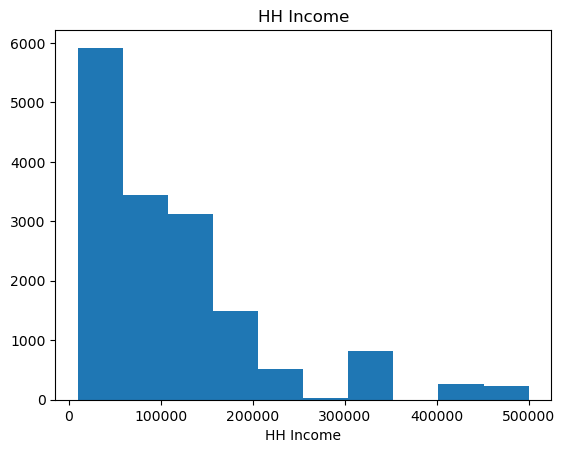

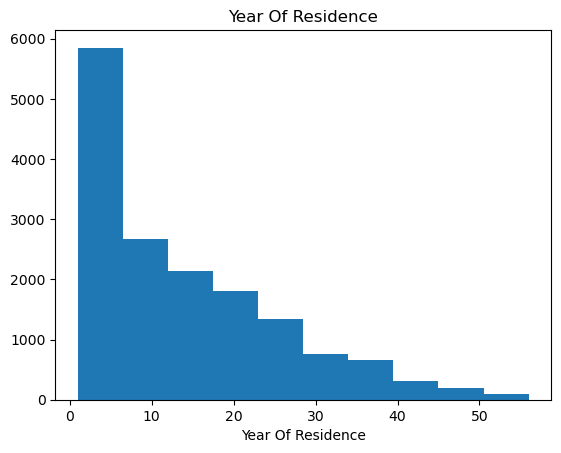

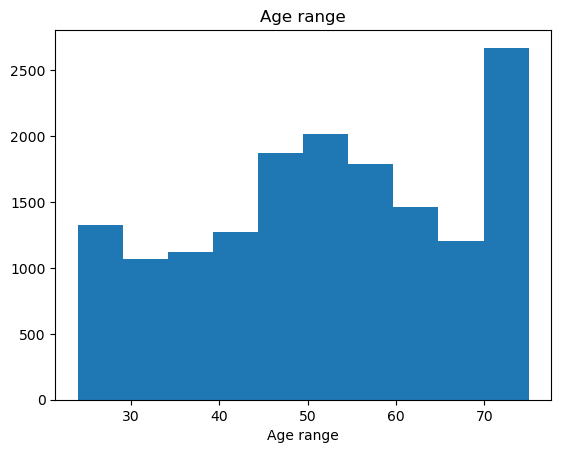

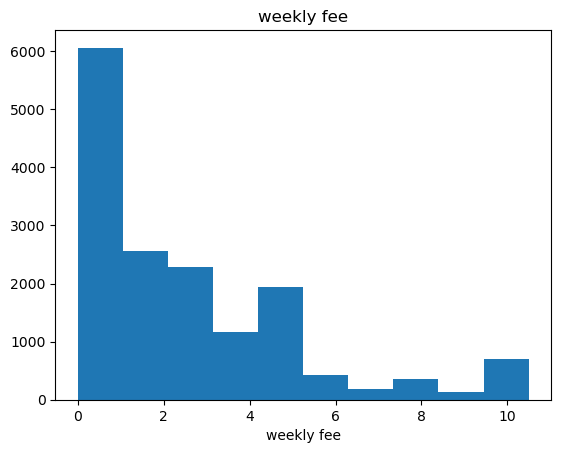

In [16]:
# Univariate analysis
for i in df.columns:
    if df[i].dtype =='float64' or df[i].dtype =='int64':
        col = df[i]
        plt.xlabel(str(i))
        plt.title(str(i))
        plt.hist(col)
        plt.show()

### **1. HH Income**
- **Observation:** The distribution of household income is right-skewed, with the majority of subscribers falling into the lower-income brackets (under $100,000).
- **Implication:** Most customers belong to middle or lower-income groups, with fewer subscribers in the high-income range. This insight suggests that pricing strategies should cater to the affordability of the lower-income segment.
- **Recommendation:** Consider segmenting income groups and personalizing subscription offers accordingly.

---

### **2. Year of Residence**
- **Observation:** The distribution is also right-skewed, with most customers having a shorter residency duration (0-10 years). There is a declining trend as the years of residence increase.
- **Implication:** Newer residents might be more likely to subscribe, whereas long-term residents tend to decrease in frequency.
- **Recommendation:** Marketing efforts might focus more on newer movers, potentially offering loyalty incentives to those with longer tenures to retain them.

---

### **3. Age Range**
- **Observation:** The distribution appears relatively balanced across different age groups, with peaks in the older age ranges (70+).
- **Implication:** There is a strong presence of older subscribers, possibly indicating that traditional print subscriptions are more popular among older demographics.
- **Recommendation:** Introduce digital offerings to attract younger age groups while maintaining traditional options for older customers.

---

### **4. Weekly Fee**
- **Observation:** The weekly subscription fee distribution is heavily skewed towards the lower price ranges (under $2), with relatively few subscribers paying higher fees.
- **Implication:** Most customers prefer low-cost subscriptions, which indicates price sensitivity among subscribers.
- **Recommendation:** Consider offering tiered pricing models and discount strategies to encourage higher-tier subscription adoption.

---

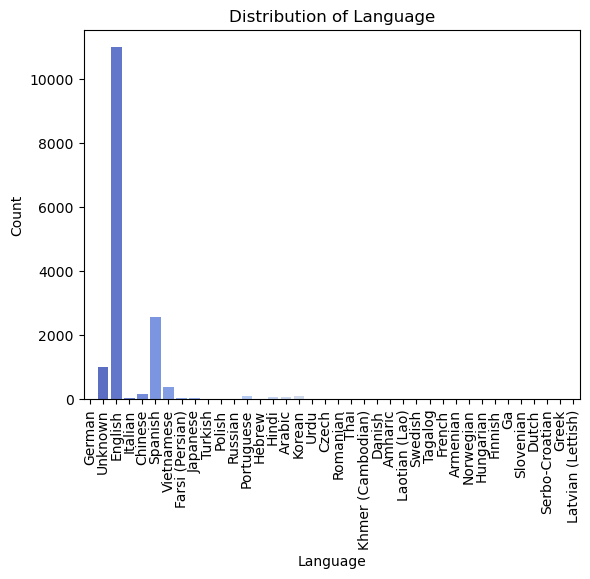

In [17]:
sns.countplot(data=df, x='Language', palette='coolwarm')
plt.title('Distribution of Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

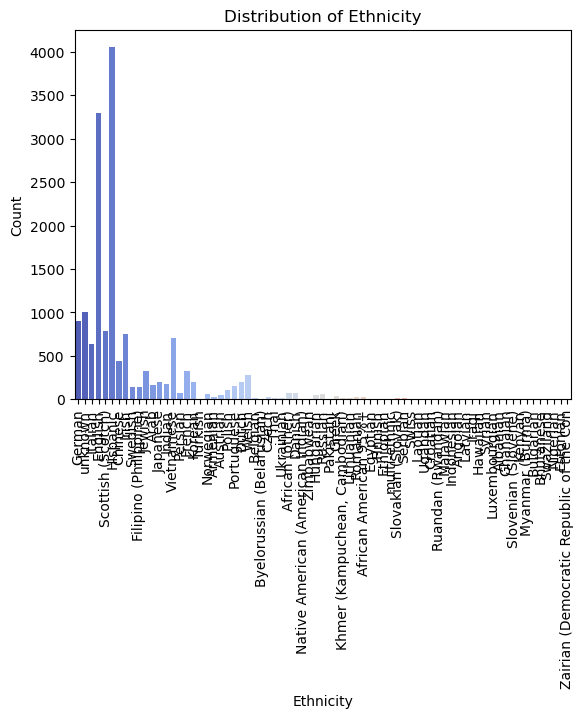

In [18]:
sns.countplot(data=df, x='Ethnicity', palette='coolwarm')
plt.title('Distribution of Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

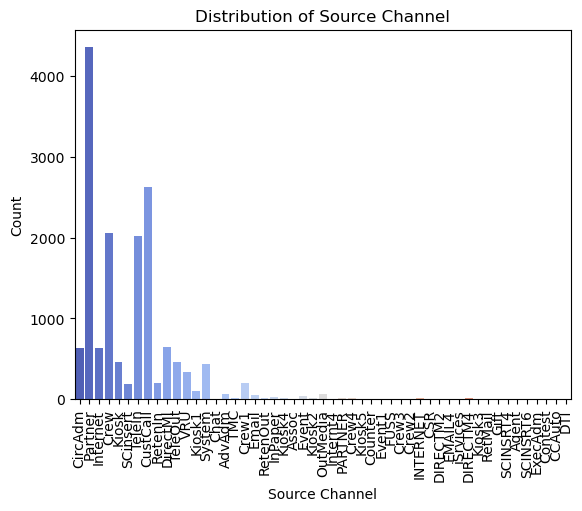

In [19]:
sns.countplot(data=df, x='Source Channel', palette='coolwarm')
plt.title('Distribution of Source Channel')
plt.xlabel('Source Channel')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

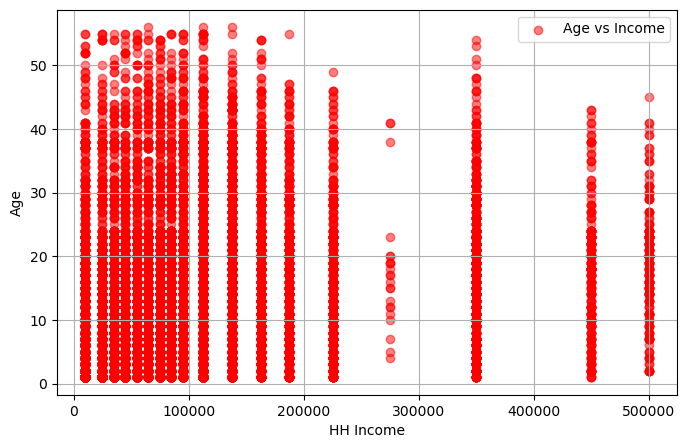

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(df['HH Income'], df['Year Of Residence'], color='red', alpha=0.5, label='Age vs Income')
plt.xlabel('HH Income')
plt.ylabel('Age')
plt.grid(True)
plt.legend()
plt.show()

#### **1. Scatter Plot: Age vs Household Income (HH Income)**
- **Observation:**
  - There is no strong visible correlation between age and household income.
  - Most data points are concentrated in lower income ranges (under $100,000), and across all age groups, indicating income diversity.
  - Higher income brackets (above $200,000) have fewer data points, implying fewer high-income subscribers.
  - Some vertical clustering suggests possible discretization in income values.

- **Implication:**
  - Age is not a strong determinant of income within this dataset.
  - Marketing efforts should focus on offering varied subscription plans regardless of income levels.

---

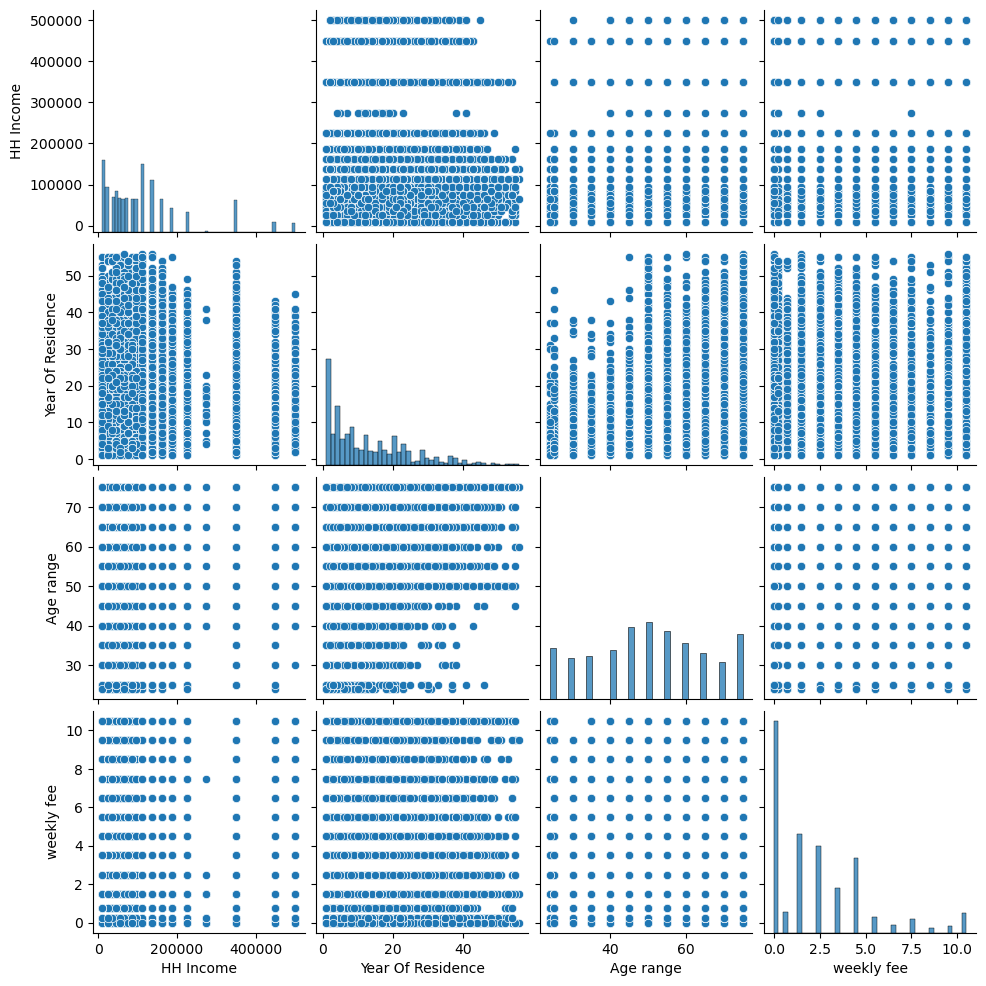

In [21]:
# Bivariate analysis
sns.pairplot(df)
plt.show()

#### **2. Pairplot Analysis**
This plot showcases the pairwise relationships among numerical variables: `HH Income`, `Year of Residence`, `Age Range`, and `Weekly Fee`.

- **Key Observations:**
  - **HH Income vs. Age:** Similar to the scatter plot, no clear correlation is observed.
  - **HH Income vs. Year of Residence:** No strong pattern, indicating length of residence does not correlate significantly with income.
  - **Weekly Fee Distribution:** Most subscribers prefer lower-cost plans, visible by the clustering at the lower end.
  - **Year of Residence:** Shows a right-skewed distribution, meaning most customers are relatively new residents.

- **Implication:**
  - There is no strong pairwise relationship among the numerical variables.
  - Customers across all age and income groups tend to prefer lower weekly fees.
  - Future modeling should explore potential interactions with categorical variables for deeper insights.

---

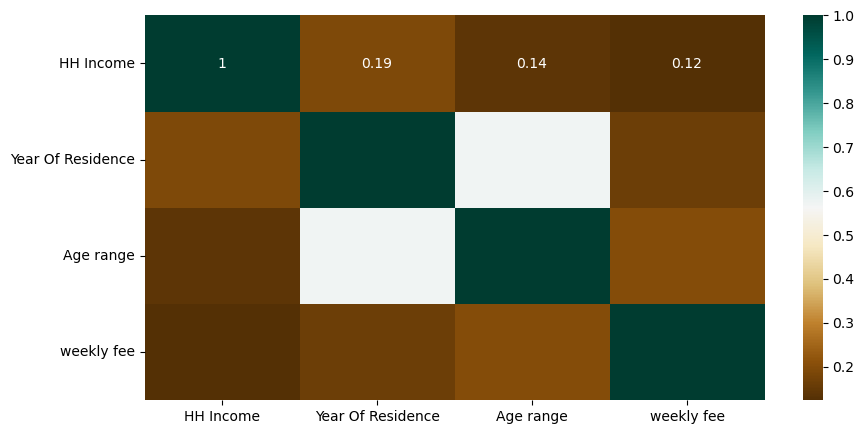

In [22]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 5))
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

#### **3. Correlation Heatmap**
This heatmap provides Pearson correlation values among numerical variables.

- **Key Observations:**
  - **HH Income and Year of Residence:** Weak positive correlation (0.19), indicating a slight tendency for higher-income individuals to have longer residence duration.
  - **HH Income and Age:** Weak correlation (0.14), meaning income levels are not strongly associated with age.
  - **Weekly Fee and Other Variables:** Minimal correlation (0.12 with HH Income, 0.14 with Age), indicating weekly fee preferences do not depend significantly on age or income.

- **Implication:**
  - Since correlation values are low, none of the numerical variables have a strong linear relationship with each other.
  - Feature engineering should explore interaction terms or non-linear relationships for better predictive power.
  - Additional factors (e.g., categorical variables like `Home Ownership` or `Subscription Type`) might provide better predictors for customer behavior.

---

In [23]:
categorical_columns = ['Ethnicity', 'dummy for Children', 'Language','Deliveryperiod', 'Nielsen Prizm', 'Source Channel','Subscriber']

def label_encode(data, column):
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    print(f"Label encoding applied to '{column}'. Unique values mapped: {dict(enumerate(le.classes_))}")
    return data

# Apply label encoding to all specified categorical columns
for column in categorical_columns:
    df = label_encode(df, column)

# Display the first few rows of the encoded DataFrame
df.head()

Label encoding applied to 'Ethnicity'. Unique values mapped: {0: 'African (other)', 1: 'African American 95%+', 2: 'Albanian', 3: 'Angolan', 4: 'Arab', 5: 'Armenian', 6: 'Austrian', 7: 'Belgian', 8: 'Bhutanese', 9: 'Bulgarian', 10: 'Byelorussian (Belarusian)', 11: 'Chinese', 12: 'Croatian', 13: 'Czech', 14: 'Danish', 15: 'Dutch', 16: 'Egyptian', 17: 'English', 18: 'Estonian', 19: 'Ethiopian', 20: 'Filipino (Philippine)', 21: 'Finnish', 22: 'French', 23: 'German', 24: 'Ghanaian', 25: 'Greek', 26: 'Hawaiian', 27: 'Hispanic', 28: 'Hungarian', 29: 'Indian', 30: 'Indonesian', 31: 'Iraqi', 32: 'Irish', 33: 'Italian', 34: 'Japanese', 35: 'Jewish', 36: 'Kenyan', 37: 'Khmer (Kampuchean, Cambodian)', 38: 'Korean', 39: 'Laotian', 40: 'Latvian', 41: 'Lithuanian', 42: 'Luxembourgian', 43: 'Malawian', 44: 'Myanmar (Burma)', 45: 'Native American (American Indian)', 46: 'Nigerian', 47: 'Norwegian', 48: 'Pakistani', 49: 'Persian', 50: 'Polish', 51: 'Portuguese', 52: 'Romanian', 53: 'Ruandan (Rwandan)',

,HH Income,Home Ownership,Ethnicity,dummy for Children,Year Of Residence,Age range,Language,weekly fee,Deliveryperiod,Nielsen Prizm,Source Channel,Subscriber
0,34999.5,RENTER,23,0,1,25,12,7.495,1,1,6,0
1,500000.0,OWNER,72,1,14,50,35,0.255,20,5,38,1
2,112499.5,OWNER,33,1,7,45,7,0.255,20,5,38,1
3,224999.5,OWNER,17,0,23,55,7,1.495,20,5,28,0
4,54999.5,OWNER,33,0,23,60,7,8.495,23,4,9,1


Label Encoding of Categorical Columns
The categorical columns encoded are:

- Ethnicity (73 unique values)
- dummy for Children (binary: 'Y', 'N')
- Language (38 unique values)
- Deliveryperiod (28 unique values)
- Nielsen Prizm (9 unique values)
- Source Channel (51 unique values)
- Subscriber (binary: 'YES', 'NO')
  
Key Points:
- Purpose: Label encoding converts categorical text values into numerical representations, which are necessary for machine learning algorithms that cannot process string-based data.
- Encoding Approach: Each unique category is mapped to an integer value. For example, in the Ethnicity column, 'German' is mapped to 23, and 'unknown' to 72.
- Potential Impact:
- Suitable for ordinal relationships (e.g., dummy for Children and Subscriber).
- Risk of misinterpretation in models sensitive to numerical relationships (e.g., distance-based models like KNN, SVM), as it may introduce unintended ordinal relationships among non-ordinal data (e.g., Ethnicity and Language).
- Useful for tree-based models (e.g., decision trees, random forests), which handle categorical features well without assuming order.

In [24]:
# One-hot encoding for the 'Home Ownership' column
df = pd.get_dummies(df, columns=['Home Ownership'], prefix='HomeOwnership', drop_first=False)

# Display the first few rows of the DataFrame
df.head()

,HH Income,Ethnicity,dummy for Children,Year Of Residence,Age range,Language,weekly fee,Deliveryperiod,Nielsen Prizm,Source Channel,Subscriber,HomeOwnership_OWNER,HomeOwnership_RENTER
0,34999.5,23,0,1,25,12,7.495,1,1,6,0,False,True
1,500000.0,72,1,14,50,35,0.255,20,5,38,1,True,False
2,112499.5,33,1,7,45,7,0.255,20,5,38,1,True,False
3,224999.5,17,0,23,55,7,1.495,20,5,28,0,True,False
4,54999.5,33,0,23,60,7,8.495,23,4,9,1,True,False


One-Hot Encoding for Home Ownership Column
The column Home Ownership is one-hot encoded, which creates binary indicator columns for each unique value.

Transformation Applied:
- Original categories: OWNER, RENTER
New columns created:
- HomeOwnership_OWNER (1 if OWNER, 0 otherwise)
- HomeOwnership_RENTER (1 if RENTER, 0 otherwise)
  
Key Points:
- Purpose: One-hot encoding is appropriate for nominal (non-ordinal) categorical variables, where each category is represented as an independent feature.
Advantage:
- Prevents unintended ordinal relationships that may arise from label encoding.
- Helps models interpret data more accurately when categorical features do not have a natural order.

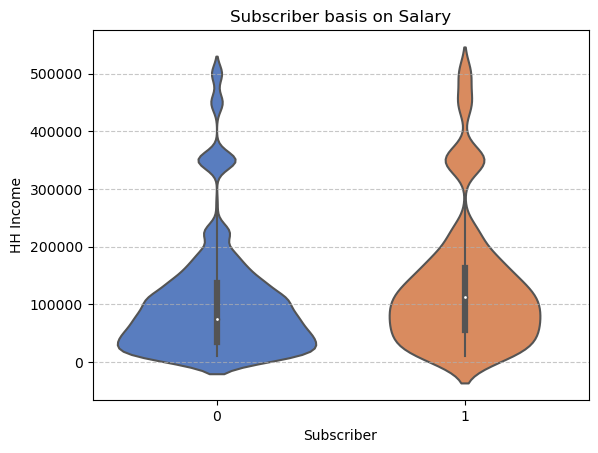

In [25]:
violin_data = df[['HH Income', 'Subscriber']].dropna()

sns.violinplot(x='Subscriber', y='HH Income', data=violin_data, palette='muted')

plt.title('Subscriber basis on Salary')
plt.xlabel('Subscriber')
plt.ylabel('HH Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Income Distribution: Both subscribers and non-subscribers have a similar income distribution, with most individuals earning below $150,000.
  
- Central Tendency: The median income and interquartile range (IQR) are comparable for both groups, indicating income alone may not strongly influence subscription status.
- High-Income Outliers: Some individuals earning above $300,000-$500,000 exist in both categories, but they are relatively few.
- Density Differences: Non-subscribers show slightly higher density in the very low-income bracket.
- Key Insight: Household income alone is not a strong predictor of subscription; other factors should be analyzed for better segmentation.

In [26]:
# Display the transformed dataframe
print("Updated Numeric DataFrame:")
print(df.head())

# Verify the data types
print("\nData Types after Encoding:")
print(df.dtypes)

Updated Numeric DataFrame:
   HH Income  Ethnicity  dummy for Children  Year Of Residence  Age range  \
0    34999.5         23                   0                  1         25   
1   500000.0         72                   1                 14         50   
2   112499.5         33                   1                  7         45   
3   224999.5         17                   0                 23         55   
4    54999.5         33                   0                 23         60   

   Language  weekly fee  Deliveryperiod  Nielsen Prizm  Source Channel  \
0        12       7.495               1              1               6   
1        35       0.255              20              5              38   
2         7       0.255              20              5              38   
3         7       1.495              20              5              28   
4         7       8.495              23              4               9   

   Subscriber  HomeOwnership_OWNER  HomeOwnership_RENTER  
0     

In [27]:
x = df.drop('Subscriber', axis=1)
y = df['Subscriber']

Split the value to train and test

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.20, random_state=38, stratify = y)

In [29]:
#Implementing KNN Model with K = 7¶
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [30]:
#Prediction of test set
prediction_knn = knn.predict(X_test)
#Print the predicted values
print("Prediction for test set: {}".format(prediction_knn))

Prediction for test set: [0 0 0 ... 0 1 0]


              precision    recall  f1-score   support

           0       0.82      0.94      0.88      2556
           1       0.39      0.15      0.22       606

    accuracy                           0.79      3162
   macro avg       0.61      0.55      0.55      3162
weighted avg       0.74      0.79      0.75      3162

Accuracy:  0.7919038583175205


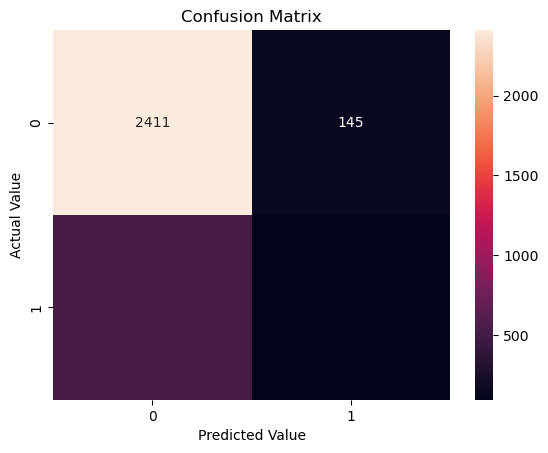

In [31]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_test, prediction_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
print(classification_report(Y_test, prediction_knn))
print("Accuracy: ",knn.score(X_test,Y_test))

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
#Prediction of test set
prediction_knn = knn.predict(X_test)
#Print the predicted values
print("Prediction for test set: {}".format(prediction_knn))

Prediction for test set: [1 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2556
           1       0.34      0.23      0.27       606

    accuracy                           0.77      3162
   macro avg       0.59      0.56      0.57      3162
weighted avg       0.74      0.77      0.75      3162

Accuracy:  0.7688172043010753


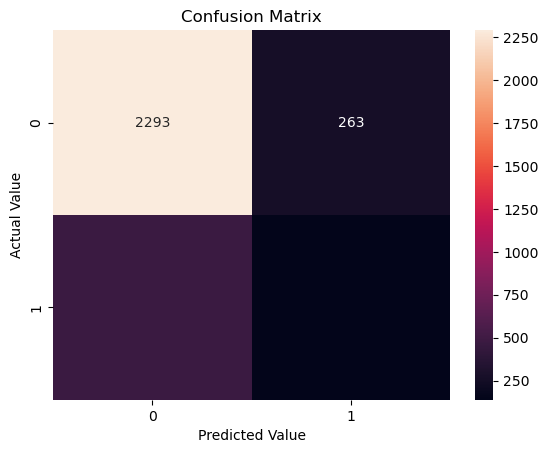

In [34]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_test, prediction_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
print(classification_report(Y_test, prediction_knn))
print("Accuracy: ",knn.score(X_test,Y_test))

In [35]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

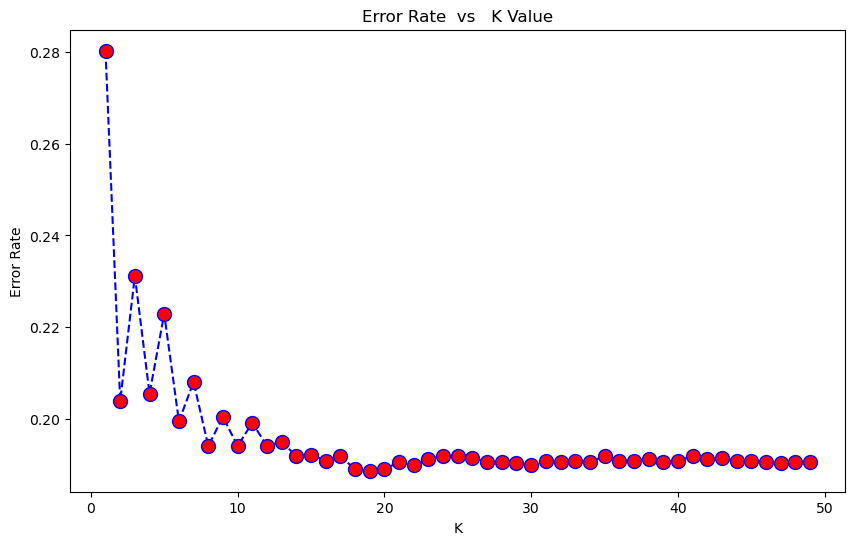

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate  vs   K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
#Implementing KNN Model with K = 19
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=19)

In [38]:
#Prediction of test set
prediction_knn = knn.predict(X_test)
#Print the predicted values
print("Prediction for test set: {}".format(prediction_knn))

Prediction for test set: [0 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2556
           1       0.55      0.08      0.14       606

    accuracy                           0.81      3162
   macro avg       0.69      0.53      0.52      3162
weighted avg       0.77      0.81      0.75      3162

Accuracy:  0.8111954459203036


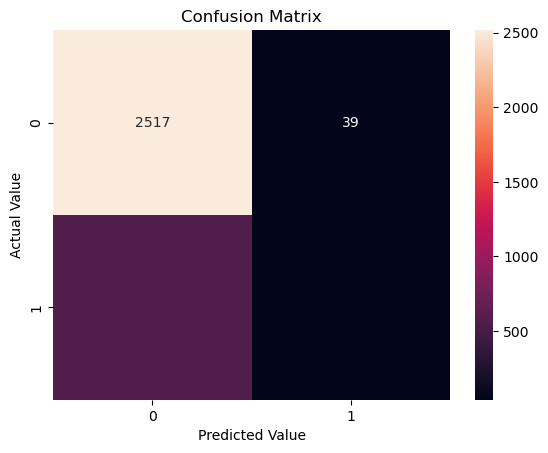

In [39]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_test, prediction_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
print(classification_report(Y_test, prediction_knn))
print("Accuracy: ",knn.score(X_test,Y_test))

### Interpretation of the KNN Model Attempts

#### **1. Error Rate vs K Value Plot**
- The plot shows how the error rate decreases initially and stabilizes after a certain K value.
- The error rate is highest when `K=1` (overfitting risk), and it gradually decreases, stabilizing around `K=19-20`.
- Choosing a very low `K` results in high variance (overfitting), while a very high `K` may result in underfitting.

---

### **2. KNN Model Attempts**

#### **Attempt 1: K = 3**
- **Accuracy:** 76.88%
- **Precision (Class 1):** 0.34 (low, meaning many false positives)
- **Recall (Class 1):** 0.23 (low, meaning many false negatives)
- **Observations:**
  - The model performs well for class `0` but struggles with class `1` (minority class).
  - High sensitivity to noise due to the small value of K.
  - Likely overfitting, as the model closely follows the training data.

---

#### **Attempt 2: K = 7**
- **Accuracy:** 79.19% (improved from K=3)
- **Precision (Class 1):** 0.39 (slight improvement)
- **Recall (Class 1):** 0.15 (lower recall compared to K=3)
- **Observations:**
  - The model's performance improved overall but still has difficulty predicting the minority class.
  - Increasing K reduced variance and made the model more generalized.
  - Recall dropped, indicating fewer correct positive predictions.

---

#### **Attempt 3: K = 19**
- **Accuracy:** 81.00% (highest so far)
- **Precision (Class 1):** 0.55 (significant improvement)
- **Recall (Class 1):** 0.08 (very low, poor minority class detection)
- **Observations:**
  - The model generalizes better, leading to the highest accuracy.
  - Precision for class `1` increased, meaning fewer false positives.
  - However, recall is very low, indicating that the model is missing a lot of actual class `1` instances.
  - The model might be underfitting slightly, favoring the majority class.

---

### **Comparison and Insights**

| K Value | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | Observations |
|---------|----------|---------------------|-----------------|-------------------|--------------|
| 3       | 76.88%   | 0.34                  | 0.23            | 0.27              | Overfitting, high variance |
| 7       | 79.19%   | 0.39                  | 0.15            | 0.22              | Balanced trade-off |
| 19      | 81.00%   | 0.55                  | 0.08            | 0.14              | Underfitting, low recall |

---

In [44]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_curve, auc, precision_recall_fscore_support
)

def enhanced_decision_tree(X, y):
    # Encode target labels if needed
    if y.dtype == 'object' or y.dtype == 'category':
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        y = le.fit_transform(y)

    y_binarized = label_binarize(y, classes=np.unique(y))
    n_classes = y_binarized.shape[1]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    y_test_binarized = label_binarize(y_test, classes=np.unique(y))
    results = {}

    # Models to evaluate
    models = {
        "Gini": DecisionTreeClassifier(criterion="gini", max_depth=6, min_samples_split=10, random_state=42),
        "Entropy": DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_split=10, random_state=42),
    }


    for model_name, model in models.items():
        print(f"\n--- Decision Tree using {model_name} Criterion ---")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[f"Decision Tree ({model_name})"] = acc

        # Performance Metrics
        print(f"Accuracy: {acc}")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))
        
        precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F-Score: {fscore:.2f}")

        importance = model.feature_importances_
        for name, imp in zip(X.columns, importance):
            print(f"{name}: {imp}")


        # ROC Curve
        plt.figure(figsize=(8, 6))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
        plt.title(f"ROC Curve for Decision Tree ({model_name})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.show()

        # Visualize the Tree
        plt.figure(figsize=(20, 10))
        plot_tree(model, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True, fontsize=10)
        plt.title(f"Decision Tree Visualization ({model_name})")
        plt.show()

    # --- Comparative Bar Plot ---
    plt.figure(figsize=(5, 6))
    plt.bar(results.keys(), results.values(), color=['skyblue', 'orange', 'lightgreen', 'coral'])
    plt.title("Decision Tree: Accuracy Comparison")
    plt.xticks(rotation=45)
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.show()


--- Decision Tree using Gini Criterion ---
Accuracy: 0.8418722327640734
Confusion Matrix:
 [[2444  112]
 [ 388  218]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      2556
           1       0.66      0.36      0.47       606

    accuracy                           0.84      3162
   macro avg       0.76      0.66      0.69      3162
weighted avg       0.82      0.84      0.82      3162

Precision: 0.82, Recall: 0.84, F-Score: 0.82
HH Income: 0.0013722560946979182
Ethnicity: 0.0013898591154012532
dummy for Children: 0.0
Year Of Residence: 0.07508997871251434
Age range: 0.02566901056761753
Language: 0.0
weekly fee: 0.5630833021131927
Deliveryperiod: 0.15363326011084538
Nielsen Prizm: 0.003592690099675422
Source Channel: 0.1761696431860556
HomeOwnership_OWNER: 0.0
HomeOwnership_RENTER: 0.0


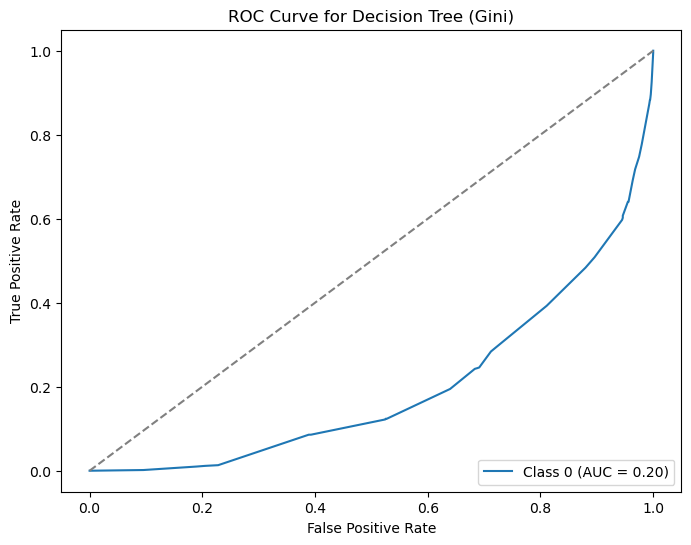

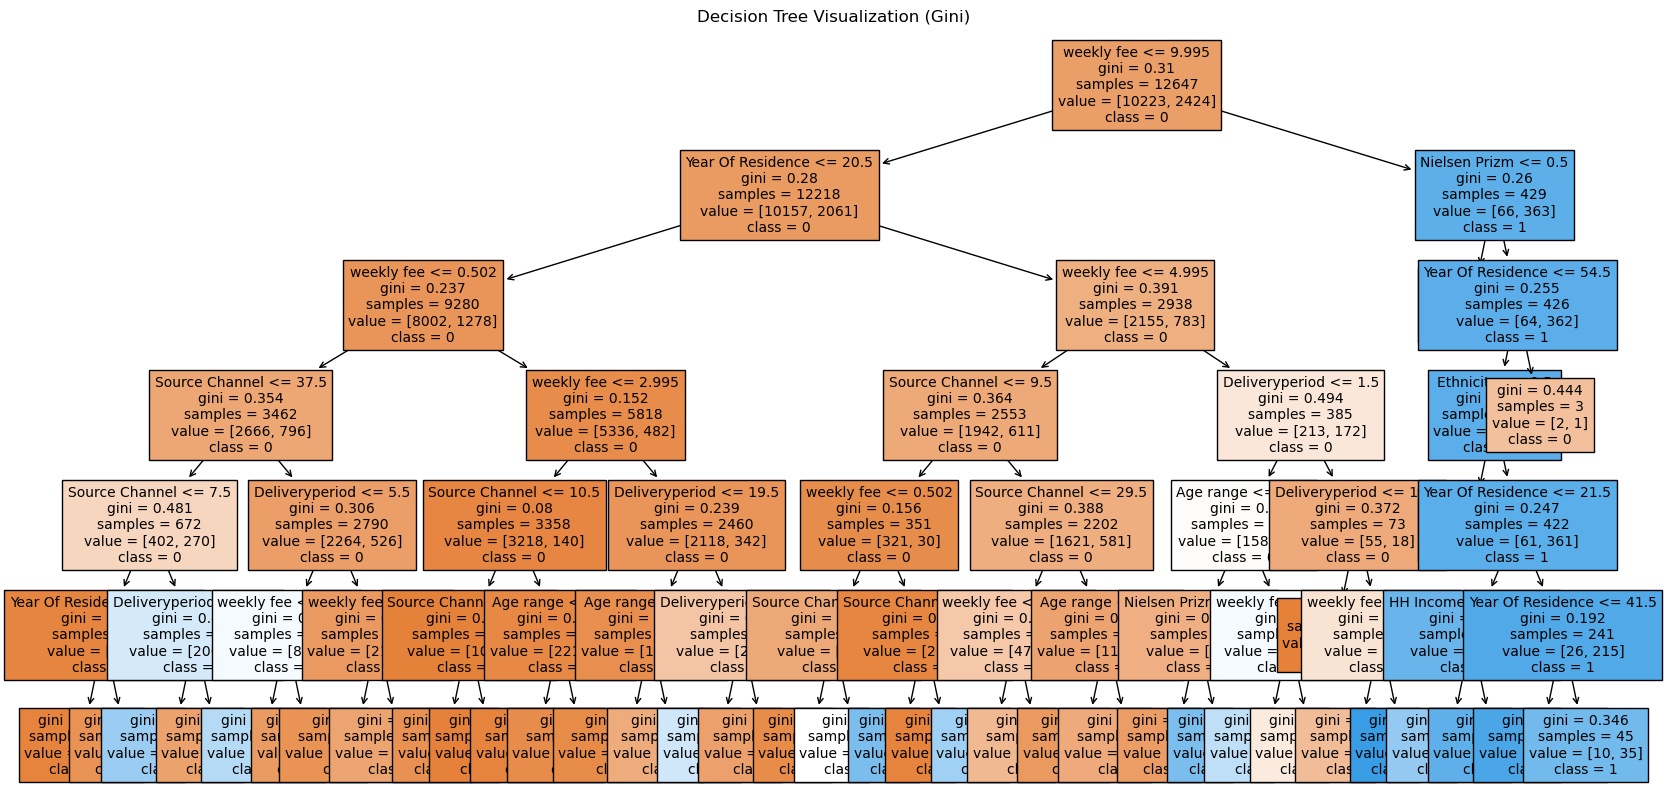


--- Decision Tree using Entropy Criterion ---
Accuracy: 0.8355471220746363
Confusion Matrix:
 [[2481   75]
 [ 445  161]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      2556
           1       0.68      0.27      0.38       606

    accuracy                           0.84      3162
   macro avg       0.77      0.62      0.64      3162
weighted avg       0.82      0.84      0.80      3162

Precision: 0.82, Recall: 0.84, F-Score: 0.80
HH Income: 0.007985033007724232
Ethnicity: 0.0055500790799601525
dummy for Children: 0.0
Year Of Residence: 0.09873463941184951
Age range: 0.03677216851104026
Language: 0.0
weekly fee: 0.4876364909951688
Deliveryperiod: 0.05715803806015016
Nielsen Prizm: 0.011224890412852209
Source Channel: 0.2921788774524463
HomeOwnership_OWNER: 0.0
HomeOwnership_RENTER: 0.002759783068808206


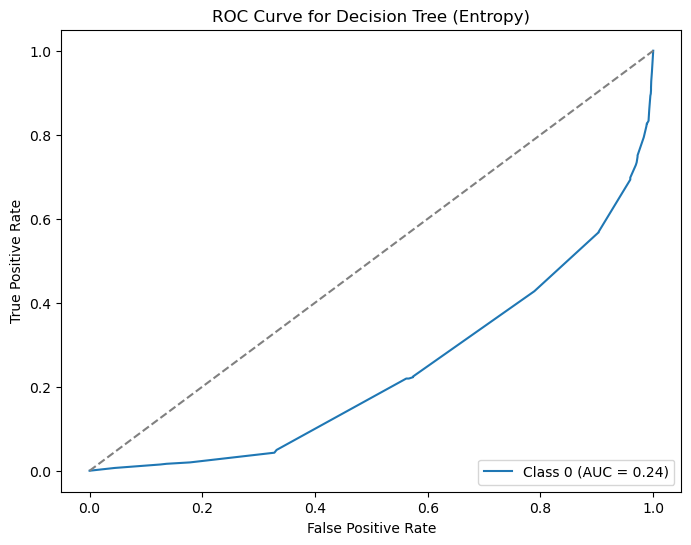

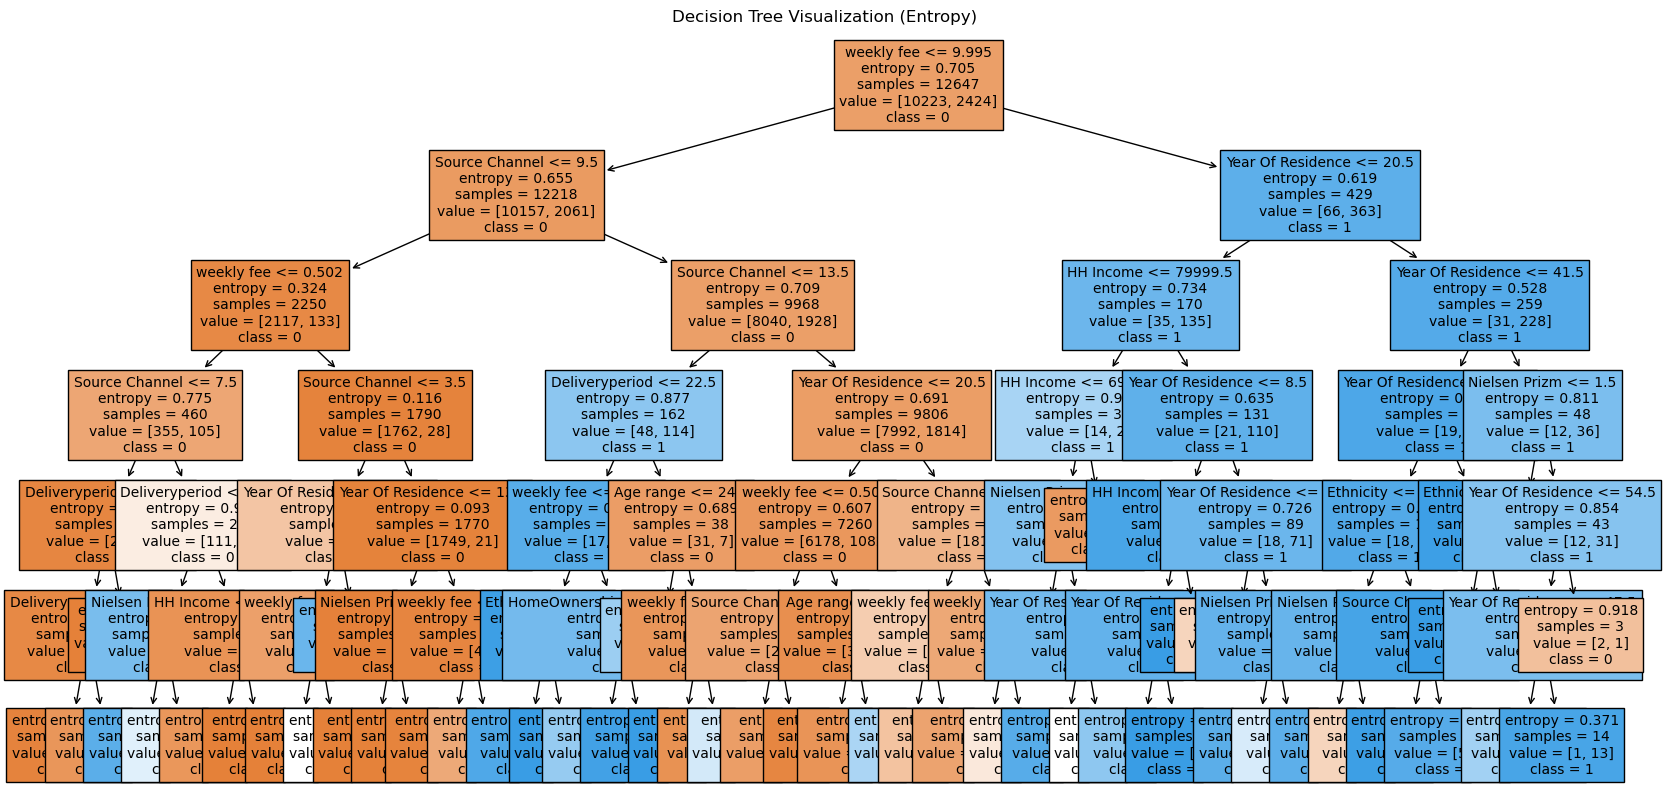

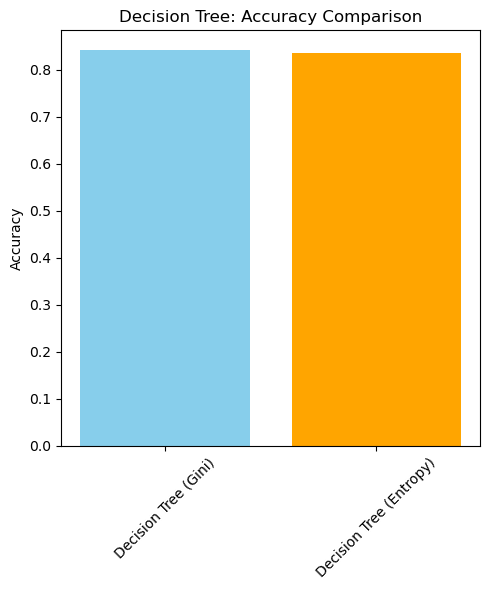

In [45]:
enhanced_decision_tree(x,y)

### **Decision Tree Model Interpretation**

#### **1. Decision Tree using Gini Criterion**
- **Accuracy:** 84.19%
- **Confusion Matrix:**
  - True Negatives (TN): 2444
  - False Positives (FP): 112
  - False Negatives (FN): 388
  - True Positives (TP): 218

- **Classification Report:**
  - **Precision:** 0.86 (Class 0), 0.66 (Class 1)
  - **Recall:** 0.96 (Class 0), 0.36 (Class 1)
  - **F1-score:** 0.91 (Class 0), 0.47 (Class 1)
  - **Macro Avg F1-score:** 0.69
  - **Weighted Avg F1-score:** 0.82

- **Feature Importance Ranking (Top 3):**
  1. **Weekly Fee:** 56.31%
  2. **Source Channel:** 17.61%
  3. **Delivery Period:** 15.36%

**Key Observations:**
- The model performs well for class 0 (non-subscribers) but struggles with class 1 (subscribers), having a recall of only 36%.
- The most important factor influencing predictions is the weekly fee.
- High precision for class 0 means the model is good at predicting non-subscribers but less effective at identifying subscribers.

---

#### **2. Decision Tree using Entropy Criterion**
- **Accuracy:** 83.55%
- **Confusion Matrix:**
  - True Negatives (TN): 2481
  - False Positives (FP): 75
  - False Negatives (FN): 445
  - True Positives (TP): 161

- **Classification Report:**
  - **Precision:** 0.85 (Class 0), 0.68 (Class 1)
  - **Recall:** 0.97 (Class 0), 0.27 (Class 1)
  - **F1-score:** 0.91 (Class 0), 0.38 (Class 1)
  - **Macro Avg F1-score:** 0.64
  - **Weighted Avg F1-score:** 0.80

- **Feature Importance Ranking (Top 3):**
  1. **Weekly Fee:** 48.76%
  2. **Source Channel:** 29.22%
  3. **Year of Residence:** 9.87%

**Key Observations:**
- The entropy-based model provides slightly lower accuracy compared to the Gini model.
- Recall for class 1 is lower (27%), meaning more false negatives (missed subscribers).
- The feature importance distribution suggests a higher reliance on "Source Channel" compared to the Gini model.

---

### **3. ROC Curve Analysis**
- **Gini Criterion AUC:** 0.20 (Poor performance, close to random guessing)
- **Entropy Criterion AUC:** 0.24 (Slight improvement but still poor performance)

**Key Observations:**
- Both models exhibit poor discrimination ability, as AUC values are significantly lower than 0.5.
- The models are not effective in distinguishing between classes, indicating potential class imbalance issues.

---

### **4. Accuracy Comparison**
- **Gini Model:** Slightly better at overall accuracy (84.19%) and performs better at handling class 1.
- **Entropy Model:** Slightly lower accuracy (83.55%) and higher class 0 recall but struggles even more with class 1.

---

### **Comparison of KNN and Decision Tree Models**


## **1. Performance Metrics Comparison**

| Metric        | KNN (K=19)    | Decision Tree (Gini) | Decision Tree (Entropy) |
|-------------------|-------------------|--------------------------|-----------------------------|
| Accuracy          | **81.00%**          | **84.19%**                 | 83.55%                      |
| Precision (Class 1) | 0.55               | **0.66**                   | 0.68                        |
| Recall (Class 1)    | 0.08                | **0.36**                   | 0.27                         |
| F1-score (Class 1)  | 0.14                | **0.47**                   | 0.38                         |
| AUC Score          | N/A                 | **0.20**                    | 0.24                         |

**Key Observations:**
- The **Decision Tree (Gini)** outperforms KNN in overall accuracy and in detecting the minority class (class 1) with higher precision and recall.
- KNN has a lower recall for class 1, meaning it struggles more to identify true positives.
- Decision trees provide better balance between precision and recall, whereas KNN is highly sensitive to class imbalance.
- The entropy-based decision tree performs slightly worse than Gini in terms of recall but provides better AUC (0.24 vs. 0.20), meaning it might generalize better.

---

## **2. Class Imbalance Handling**
- **KNN:** Struggles with class imbalance, especially when minority classes are underrepresented. It tends to classify most samples as the majority class, which results in low recall for class 1.
- **Decision Tree:** Handles class imbalance better by adjusting split criteria based on impurity measures (Gini/Entropy), but still shows low recall for class 1.

**Winner:** Decision Tree (better recall and precision for minority class).

---

## **3. Interpretability**
- **KNN:** 
  - Considered a "black box" method; it is difficult to interpret how decisions are made.
  - Predictions depend heavily on the choice of `K` and the distance metric.
  - No insight into feature importance.

- **Decision Tree:** 
  - Provides an interpretable model through visualization.
  - Feature importance can be derived directly, showing the influence of key variables like `weekly fee` and `source channel`.
  - Easier to explain to stakeholders.

**Winner:** Decision Tree (high interpretability).

---

## **4. Feature Importance**
- **KNN:** 
  - Treats all features equally, leading to suboptimal performance if irrelevant or noisy features exist.
  - No built-in feature selection mechanism.

- **Decision Tree:** 
  - Automatically selects important features (e.g., `weekly fee` had the highest importance).
  - Can identify and rank important features for better insights.

**Winner:** Decision Tree (better feature handling).

---

## **5. Computational Efficiency**
- **KNN:** 
  - Slow for large datasets, as it computes the distance for every query point.
  - High memory consumption as it stores the entire dataset.

- **Decision Tree:** 
  - Faster once trained, as predictions require traversing the tree.
  - More memory efficient compared to KNN.

**Winner:** Decision Tree (better efficiency in large datasets).

---

## **6. Sensitivity to Hyperparameters**
- **KNN:** 
  - Highly sensitive to `K` value and distance metric choice (Euclidean, Manhattan, etc.).
  - Performance varies significantly with parameter tuning.

- **Decision Tree:** 
  - Sensitive to `max_depth`, `min_samples_split`, and pruning techniques.
  - Overfitting can occur if not properly tuned.

**Winner:** Both have hyperparameter challenges, but KNN is more sensitive.

---

## **7. Scalability**
- **KNN:** 
  - Does not scale well with large datasets due to high computational costs.
  - Performs better in small to medium-sized datasets.

- **Decision Tree:** 
  - Scales better with larger datasets but can become complex and overfit.

**Winner:** Decision Tree (better scalability).

---

## **8. Robustness to Noise**
- **KNN:** 
  - Sensitive to noise; outliers can significantly affect predictions.
  - No internal mechanism to filter noise.

- **Decision Tree:** 
  - Pruning techniques can help mitigate noise.
  - Handles outliers better by splitting them into separate nodes.

**Winner:** Decision Tree (better robustness to noise).

---

### **Conclusion:**
- The **Decision Tree (Gini)** is the better option overall, providing higher accuracy, better interpretability, and feature importance insights.
- The **KNN model** might be useful for small datasets but struggles with class imbalance and computational efficiency.
- Further improvements can be made by tuning hyperparameters, using ensemble methods, or balancing the dataset.

---